In [1]:
# again, this only works on startup!
from jax.config import config
config.update("jax_enable_x64", True)

In [2]:
import ngmix
import fitsio
import proplot as pplt
import numpy as np
import piff
import galsim
import yaml
import jax

In [3]:
%matplotlib inline

In [4]:
TNAMES = ["DES0131-3206", "DES0137-3749", "DES0221-0750", "DES0229-0416"]
BANDS = ["g", "r", "i", "z"]

with open(
    "/Users/beckermr/MEDS_DIR/des-pizza-slices-y6-test/pizza_cutter_info/"
    "%s_%s_pizza_cutter_info.yaml" % (TNAMES[0], BANDS[0])
) as fp:
    yml = yaml.safe_load(fp.read())

In [5]:
from des_y6utils.piff.jax_model import MattsPSFColorModel

In [ ]:
# """Used under MIT from https://github.com/adam-coogan/jaxinterp2d

# MIT License

# Copyright (c) [2021] [Adam Coogan]

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# """
# import jax.numpy as jnp

# def interp2d(
#     x: jnp.ndarray,
#     y: jnp.ndarray,
#     xp: jnp.ndarray,
#     yp: jnp.ndarray,
#     zp: jnp.ndarray,
#     fill_value: jnp.ndarray = None,
# ) -> jnp.ndarray:
#     """
    
#     WARNING: x and y appear swapped here!
    
#     Bilinear interpolation on a grid.

#     Args:
#         x, y: 1D arrays of point at which to interpolate. Any out-of-bounds
#             coordinates will be clamped to lie in-bounds.
#         xp, yp: 1D arrays of points specifying grid points where function values
#             are provided.
#         zp: 2D array of function values. For a function `f(x, y)` this must
#             satisfy `zp[i, j] = f(xp[i], yp[j])`

#     Returns:
#         1D array `z` satisfying `z[i] = f(x[i], y[i])`.
#     """
#     if xp.ndim != 1 or yp.ndim != 1:
#         raise ValueError("xp and yp must be 1D arrays")
#     if zp.shape != (xp.shape + yp.shape):
#         raise ValueError("zp must be a 2D array with shape xp.shape + yp.shape")

#     ix = jnp.clip(jnp.searchsorted(xp, x, side="right"), 1, len(xp) - 1)
#     iy = jnp.clip(jnp.searchsorted(yp, y, side="right"), 1, len(yp) - 1)

#     # Using Wikipedia's notation (https://en.wikipedia.org/wiki/Bilinear_interpolation)
#     z_11 = zp[ix - 1, iy - 1]
#     z_21 = zp[ix, iy - 1]
#     z_12 = zp[ix - 1, iy]
#     z_22 = zp[ix, iy]

#     z_xy1 = (xp[ix] - x) / (xp[ix] - xp[ix - 1]) * z_11 + (x - xp[ix - 1]) / (
#         xp[ix] - xp[ix - 1]
#     ) * z_21
#     z_xy2 = (xp[ix] - x) / (xp[ix] - xp[ix - 1]) * z_12 + (x - xp[ix - 1]) / (
#         xp[ix] - xp[ix - 1]
#     ) * z_22

#     z = (yp[iy] - y) / (yp[iy] - yp[iy - 1]) * z_xy1 + (y - yp[iy - 1]) / (
#         yp[iy] - yp[iy - 1]
#     ) * z_xy2

#     if fill_value is not None:
#         oob = (x < xp[0]) | (x > xp[-1]) | (y < yp[0]) | (y > yp[-1])
#         z = jnp.where(oob, fill_value, z)

#     return z

In [ ]:
# import scipy.optimize
# import jax.numpy as jnp
# import itertools


# def _get_star_stamp_pos(s, img, wgt, bbox):
#     xint = int(np.floor(s.x - 1 + 0.5))
#     yint = int(np.floor(s.y - 1 + 0.5))
#     bbox_2 = (bbox - 1)//2
#     dx = s.x - 1 - xint
#     dy = s.y - 1 - yint

#     return dict(
#         img=img[yint-bbox_2: yint+bbox_2+1, xint-bbox_2: xint+bbox_2+1].copy(),
#         wgt=wgt[yint-bbox_2: yint+bbox_2+1, xint-bbox_2: xint+bbox_2+1].copy(),
#         xstart=xint-bbox_2,
#         ystart=yint-bbox_2,
#         dim=bbox,
#         x=s.x - 1,
#         y=s.y - 1,
#         dx=dx,
#         dy=dy,
#         xcen=bbox_2 + dx,
#         ycen=bbox_2 + dy,
#     )


# def get_star_obs(piff_mod, s, img, wgt, piff_prop, star_dim):

#     if piff_prop:
#         kwargs = {
#             piff_prop: s.data.properties[piff_prop]
#         }
#     else:
#         kwargs = {}
#     sres = _get_star_stamp_pos(s, img, wgt, star_dim)
#     sres.update(**kwargs)

#     xv = sres["x"]+1
#     yv = sres["y"]+1
#     wcs = list(piff_mod.wcs.values())[0].local(
#         image_pos=galsim.PositionD(x=xv, y=yv)
#     ).jacobian()
#     img = galsim.ImageD(sres["dim"], sres["dim"], wcs=wcs)
#     cen = (
#         sres["x"] - sres["xstart"] + 1,
#         sres["y"] - sres["ystart"] + 1,
#     )
#     _img = sres.pop("img")
#     _wgt = sres.pop("wgt")
#     nrm = _img.sum()
#     nrm2 = nrm*nrm
#     _img /= nrm
#     _wgt *= nrm2
    
#     star_obs = ngmix.Observation(
#         image=_img,
#         weight=_wgt,
#         jacobian=ngmix.Jacobian(
#             y=cen[1]-1,
#             x=cen[0]-1,
#             wcs=wcs,
#         )
#     )
#     sres["local_wcs"] = wcs
#     star_obs.update_meta_data(sres)
    
#     if star_obs.get_s2n() > 100:
#         nse = np.sqrt(np.sum(star_obs.image**2)) / 100
#         star_obs.weight = np.ones_like(star_obs.weight) / nse**2

#     return star_obs


# def _build_star_xycol_vectors(stars):
#     x = jnp.array([star.meta["x"] for star in stars])
#     y = jnp.array([star.meta["y"] for star in stars])
#     col = jnp.array([star.meta["col"] for star in stars])
#     return dict(x=x, y=y, col=col)


# def _build_star_img_wgt_jac_arrays(stars):
#     return dict(
#         img=jnp.array([star.image.ravel() for star in stars]).T,
#         wgt=jnp.array([np.sqrt(star.weight.ravel()) for star in stars]).T,
#         dudx=jnp.array([star.meta["local_wcs"].dudx for star in stars]).T,
#         dudy=jnp.array([star.meta["local_wcs"].dudy for star in stars]),
#         dvdx=jnp.array([star.meta["local_wcs"].dvdx for star in stars]),
#         dvdy=jnp.array([star.meta["local_wcs"].dvdy for star in stars]),
#         xcen=jnp.array([star.meta["xcen"] for star in stars]),
#         ycen=jnp.array([star.meta["ycen"] for star in stars]),
#     )


# def _build_star_poly_basis(
#     *, x, y, col, colcen, colscale, 
#     xorder, colorder, 
#     xcen=1024, ycen=2048, xyscale=2048
# ):
#     xs = (x-xcen)/xyscale
#     ys = (y-ycen)/xyscale
#     cols = (col-colcen)/colscale

#     arrs = [xs, ys]
#     # nms = "xy"
#     xy_arrs = [jnp.ones_like(xs)]
#     for ln in range(1, xorder+1):
#         for cmb in itertools.combinations_with_replacement([0, 1], ln):
#             # print("".join(nms[i] for i in cmb))
#             _r = 1
#             for i in cmb:
#                 _r = _r * arrs[i]
#             xy_arrs.append(_r)
            
#     arrs = [cols, xs, ys]
#     # nms = "cxy"
#     colxy_arrs = []
#     for ln in range(1, colorder+1):
#         for cmb in itertools.combinations_with_replacement([0, 1, 2], ln):
#             if 0 not in cmb:
#                 continue
#             # print("".join(nms[i] for i in cmb))
#             _r = 1
#             for i in cmb:
#                 _r = _r * arrs[i]
#             colxy_arrs.append(_r)
    
    
#     return dict(xy=jnp.vstack(xy_arrs), colxy=jnp.vstack(colxy_arrs))


# def _build_fit_data(
#     *, star_dim, model_dim, model_scale,
#     stars, colname, colcen, colscale, init_scale,
#     xy_order, colxy_order,
# ):
#     fit_data = dict(
#         star_dim=star_dim,
#         model_dim=model_dim,
#         stars=stars,
#         colcen=colcen,
#         colscale=colscale,
#         model_scale=model_scale,
#         n_stars=len(stars),
#         colname=colname,
#         init_scale=init_scale,
#         verbose=False,
#     )
#     for star in stars:
#         star.meta["col"] = star.meta[colname]
#     fit_data["stars"] = stars
#     fit_data.update(_build_star_xycol_vectors(stars))
#     fit_data.update(_build_star_img_wgt_jac_arrays(stars))
#     fit_data["n_stars"] = len(stars)

#     res = _build_star_poly_basis(
#         x=fit_data["x"], 
#         y=fit_data["y"], 
#         col=fit_data["col"], 
#         colcen=fit_data["colcen"], 
#         colscale=fit_data["colscale"],
#         xorder=xy_order,
#         colorder=colxy_order,
#     )
    
#     fit_data["dim_xy"] = res["xy"].to_py().shape[0]
#     fit_data["dim_colxy"] = res["colxy"].to_py().shape[0]

#     n_params = (
#         fit_data["model_dim"]*fit_data["model_dim"]*fit_data["dim_xy"] 
#         + 3*fit_data["dim_colxy"]
#         + 2*len(stars)
#     )
#     fit_data["dof"] = len(stars) * star_dim**2 - n_params
#     fit_data["n_params"] = n_params
    
#     # done in numpy since a constant
#     images = np.array([
#         galsim.InterpolatedImage(
#             galsim.ImageD(s.image), 
#             wcs=s.meta["local_wcs"], 
#             offset=(s.meta["dx"], s.meta["dy"]),
#             flux=1,
#             x_interpolant="linear",
#         ).drawImage(nx=model_dim, ny=model_dim, scale=model_scale, method="no_pixel").array.ravel()
#         for s in stars
#     ])
    
#     coeffs = res["xy"].T
#     A = np.linalg.lstsq(coeffs, images, rcond=None)[0]
#     fit_data["poly_guess"] = A.T.ravel()
    
#     return fit_data


# def _init_model_params(*, model_dim, rng, stars, model_scale, init_scale, poly_guess, dim_xy, dim_colxy, n_stars):
#     tot = model_dim*model_dim*dim_xy + 3*dim_colxy + 2*n_stars
#     nse = rng.normal(size=tot, scale=init_scale)
#     nn = model_dim**2
#     nse[0:nn*dim_xy] += poly_guess
#     nse[-2*n_stars:] = rng.normal(size=2*n_stars, scale=0.1)
#     return nse


# def _extract_model_params(*, params, model_dim, dim_xy, dim_colxy):
#     nxy = model_dim**2 * dim_xy
#     xy_params = params[0:nxy]
#     dilation_params = params[nxy:nxy+dim_colxy]
#     g1_params = params[nxy+dim_colxy:nxy+dim_colxy*2]
#     g2_params = params[nxy+dim_colxy*2:nxy+dim_colxy*3]
    
#     return nxy, xy_params, dilation_params, g1_params, g2_params


# _multi_interp2d = jax.vmap(interp2d, in_axes=(1, 1, None, None, 2), out_axes=-1)


# def _get_inv_shear_mat(eta1, eta2):
#     # this algorithm is lifted from galsim and recoded in jax
#     # see https://github.com/GalSim-developers/GalSim/blob/
#     #            7d6cefb142553d9c8413dd7386f080b0015799f2/galsim/shear.py#L339
#     abseta2 = eta1**2 + eta2**2
#     abseta = jnp.sqrt(abseta2)
#     eta2g = jax.lax.select(
#         abseta > 1.e-4, 
#         # true 
#         jnp.tanh(0.5*abseta)/abseta,  
#         # false
#         0.5 + abseta2*((-1./24.) + abseta2*(1./240.)),  
#     )
    
#     g1 = eta1 * eta2g
#     g2 = eta2 * eta2g
#     g2 = g1*g1 + g2*g2
#     denom = jnp.sqrt(1-g2)
#     return (
#         (1+g1)/denom,
#         g2/denom,
#         g2/denom,
#         (1-g1)/denom,
#     )


# def _predict_stars_lowlev(
#     *, xy_params, dilation_params, g1_params, g2_params, 
#     star_xy, star_colxy, xcen, ycen, dudx, dudy, dvdx, dvdy,
#     star_dim, model_dim, model_scale, dim_xy
# ):
#     uv_img = jnp.dot(xy_params.reshape(model_dim, model_dim, dim_xy), star_xy)
#     y, x = jnp.mgrid[0:star_dim, 0:star_dim]
#     y = jnp.reshape(jnp.ravel(y), (star_dim*star_dim, 1))
#     x = jnp.reshape(jnp.ravel(x), (star_dim*star_dim, 1))
#     dy = y - ycen
#     dx = x - xcen
#     us = (dudx * dx + dudy * dy)
#     vs = (dvdx * dx + dvdy * dy)

#     if True:
#         eta1 = jnp.dot(g1_params, star_colxy)
#         eta2 = jnp.dot(g2_params, star_colxy)

#         dudus, dudvs, dvdus, dvdvs = _get_inv_shear_mat(eta1, eta2)

#         us = dudus * us + dudvs * vs
#         vs = dvdus * us + dvdvs * vs

#         dilation = jnp.exp(jnp.dot(dilation_params, star_colxy))
#         us = us/dilation
#         vs = vs/dilation
    
#     ui = jnp.arange(model_dim) - (model_dim-1)/2
#     vi = jnp.arange(model_dim) - (model_dim-1)/2

#     iimg = _multi_interp2d(vs/model_scale, us/model_scale, vi, ui, uv_img)
#     return jnp.reshape(iimg, (star_dim*star_dim, -1))


# def _predict_stars_impl(
#     *,
#     x,
#     y,
#     col,
#     colcen,
#     colscale,
#     dudx,
#     dudy,
#     dvdx,
#     dvdy,
#     xcen,
#     ycen,
#     params,
#     model_dim,
#     dim_xy,
#     dim_colxy,
#     model_scale,
#     star_dim,
#     n_stars,
#     use_cen,
#     xy_order,
#     colxy_order,
# ):
#     nxy, xy_params, dilation_params, g1_params, g2_params = _extract_model_params(
#         params=params, 
#         model_dim=model_dim, 
#         dim_xy=dim_xy, 
#         dim_colxy=dim_colxy,
#     )
#     sdx = params[nxy:nxy+n_stars]
#     sdy = params[nxy+n_stars:nxy+2*n_stars]
#     res = _build_star_poly_basis(
#         x=x, 
#         y=y, 
#         col=col, 
#         colcen=colcen, 
#         colscale=colscale,
#         xorder=xy_order,
#         colorder=colxy_order,
#     )

#     pimg = _predict_stars_lowlev(
#         xy_params=xy_params, 
#         dilation_params=dilation_params, 
#         g1_params=g1_params, 
#         g2_params=g2_params, 
#         star_xy=res["xy"], 
#         star_colxy=res["colxy"], 
#         xcen=jax.lax.select(use_cen == 1, xcen+sdx, xcen), 
#         ycen=jax.lax.select(use_cen == 0, ycen+sdy, ycen), 
#         dudx=dudx, 
#         dudy=dudy, 
#         dvdx=dvdx, 
#         dvdy=dvdy,
#         star_dim=star_dim, 
#         model_dim=model_dim, 
#         model_scale=model_scale,
#         dim_xy=dim_xy,
#     )
#     return pimg/jnp.sum(pimg, axis=0)

# _predict_stars = jax.jit(
#     _predict_stars_impl, 
#     static_argnames=("model_dim", "star_dim", "dim_xy", "dim_colxy", "n_stars", "xy_order", "colxy_order")
# )


# def _compute_chi2_per_dof_impl(
#     params,
#     x,
#     y,
#     col,
#     dudx,
#     dudy,
#     dvdx,
#     dvdy,
#     xcen,
#     ycen,
#     img,
#     wgt,
#     colcen, # 12th index
#     colscale,
#     model_dim,
#     dim_xy,
#     dim_colxy,
#     model_scale,
#     star_dim,
#     dof,
#     n_stars,
#     inv_sigma_poly,
#     xy_order,
#     colxy_order,
# ):
#     pimg = _predict_stars(
#         x=x,
#         y=y,
#         col=col,
#         colcen=colcen,
#         colscale=colscale,
#         dudx=dudx,
#         dudy=dudy,
#         dvdx=dvdx,
#         dvdy=dvdy,
#         xcen=xcen,
#         ycen=ycen,
#         params=params,
#         model_dim=model_dim,
#         dim_xy=dim_xy,
#         dim_colxy=dim_colxy,
#         model_scale=model_scale,
#         star_dim=star_dim,
#         n_stars=n_stars,
#         use_cen=1,
#         xy_order=xy_order,
#         colxy_order=colxy_order,
#     )
#     resids = (pimg - img) * wgt
#     return (
#         jnp.sum(resids**2) 
#         + jnp.sum(params[:-2*n_stars:]**2) * inv_sigma_poly**2 
#         + jnp.sum(params[-2*n_stars:]**2)/0.25
#     )/dof
    
    
# _compute_chi2_per_dof = jax.jit(
#     _compute_chi2_per_dof_impl,
#     static_argnums=tuple(range(12, 24)),
# )

# _compute_chi2_per_dof_val_and_grad = jax.value_and_grad(_compute_chi2_per_dof)
    

# class MattsColorModel(object):
#     """TODO
#     """
#     def __init__(
#         self, 
#         *,
#         piff_model, image, weight, 
#         colname, colcen, colscale,
#         init_scale=0.01,
#         star_dim=19, model_dim=17,
#         model_scale=0.3,
#         seed=None,
#         sigma_poly=np.inf,
#         xy_order=3,
#         colxy_order=3,
#     ):
#         self.image = image
#         self.weight = weight
#         self.piff = piff_model
#         stars = [
#             get_star_obs(self.piff, s, self.image, self.weight, colname, star_dim)
#             for s in self.piff.stars
#         ]

#         self.fit_data = _build_fit_data(
#             star_dim=star_dim, 
#             model_dim=model_dim, 
#             stars=stars, 
#             colname=colname, 
#             colcen=colcen, 
#             colscale=colscale,
#             model_scale=model_scale,
#             init_scale=init_scale,
#             xy_order=xy_order,
#             colxy_order=colxy_order,
#         )
#         self.stars = self.fit_data["stars"]
        
#         if sigma_poly is None:
#             sigma_poly = np.inf
#         self.fit_data["inv_sigma_poly"] = 1.0 / sigma_poly
#         self.fit_data["xy_order"] = xy_order
#         self.fit_data["colxy_order"] = colxy_order

#         self.rng = np.random.RandomState(seed=seed)
#         self.wcs = {0: None}
#         self.dof = self.fit_data["dof"]
        
#     def fit(self, **kwargs):
#         if "verbose" in kwargs:
#             kwargs.pop("verbose")
#             iprint = 98
#         else:
#             iprint = -1
#         args = tuple([
#             self.fit_data[key]
#             for key in [
#                     "x",
#                     "y",
#                     "col",
#                     "dudx",
#                     "dudy",
#                     "dvdx",
#                     "dvdy",
#                     "xcen",
#                     "ycen",
#                     "img",
#                     "wgt",
#                     "colcen",
#                     "colscale",
#                     "model_dim",
#                     "dim_xy",
#                     "dim_colxy",
#                     "model_scale",
#                     "star_dim",
#                     "dof",
#                     "n_stars",
#                     "inv_sigma_poly",
#                     "xy_order",
#                     "colxy_order",
#             ]
#         ])
#         x0 = self.get_init_params().astype(np.float64)

#         def _fun(params, *args):
#             v, g = _compute_chi2_per_dof_val_and_grad(params, *args)
#             return v.to_py(), g.to_py().astype(np.float64)


#         opts = {"disp": None, "iprint": iprint}
#         if kwargs:
#             opts.update(kwargs)
#         else:
#             opts["ftol"] = 1e-5
            
#         self.fit_res = scipy.optimize.minimize(
#             _fun,
#             x0,
#             args=args,
#             method="L-BFGS-B",
#             jac=True,
#             options=opts,
#         )

#         self.chi2 = (
#             self.fit_res.fun * self.dof 
#             - np.sum(self.fit_res.x[:-2*self.fit_data["n_stars"]]**2) * self.fit_data["inv_sigma_poly"]**2
#             - np.sum(self.fit_res.x[-2*self.fit_data["n_stars"]:]**2)/0.25        
#         )
    
#     def get_init_params(self, init_scale=None):
#         return _init_model_params(
#                 model_dim=self.fit_data["model_dim"], 
#                 rng=self.rng, 
#                 stars=self.fit_data["stars"], 
#                 model_scale=self.fit_data["model_scale"],
#                 init_scale=init_scale or self.fit_data["init_scale"],
#                 poly_guess=self.fit_data["poly_guess"],
#                 dim_xy=self.fit_data["dim_xy"],
#                 dim_colxy=self.fit_data["dim_colxy"],
#                 n_stars=self.fit_data["n_stars"],
#             )
    
#     def get_dilation_eta1eta2(self, x, y, params=None, **kwargs):
#         if params is None:
#             if not hasattr(self, "fit_res"):
#                 raise RuntimeError("call fit!")
#             params = self.fit_res.x
        
#         if self.fit_data["colname"] in kwargs:
#             col = kwargs[self.fit_data["colname"]]
#         else:
#             col = self.fit_data["colcen"]

#         res = _build_star_poly_basis(
#             x=np.atleast_1d(x), 
#             y=np.atleast_1d(y), 
#             col=np.atleast_1d(col), 
#             colcen=self.fit_data["colcen"], 
#             colscale=self.fit_data["colscale"]
#         )

#         _, _, dilation_params, g1_params, g2_params = _extract_model_params(
#             params=params,
#             model_dim=self.fit_data["model_dim"], 
#             dim_xy=self.fit_data["dim_xy"], 
#             dim_colxy=self.fit_data["dim_colxy"],
#         )
        
#         dilation = np.exp(np.dot(dilation_params, res["colxy"]))[0]
#         eta1 = np.dot(g1_params, res["colxy"])[0]
#         eta2 = np.dot(g2_params, res["colxy"])[0]
#         return dilation, eta1, eta2
    
#     def draw(self, x, y, offset=None, params=None, **kwargs):
#         if self.fit_data["colname"] in kwargs:
#             col = kwargs[self.fit_data["colname"]]
#         else:
#             col = self.fit_data["colcen"]
        
#         if params is None:
#             if not hasattr(self, "fit_res"):
#                 raise RuntimeError("call fit!")
#             params = self.fit_res.x
        
#         x -= 1
#         y -= 1
#         wcs = list(self.piff.wcs.values())[0].local(
#             image_pos=galsim.PositionD(x=x+1, y=y+1)
#         ).jacobian()
        
#         scen = (self.fit_data["star_dim"]-1)/2
        
#         if offset is None:
#             offset = [
#                 x - np.floor(x+0.5),
#                 y - np.floor(y+0.5),
#             ]
        
#         _img = _predict_stars(
#                 x=jnp.array([x]),
#                 y=jnp.array([y]),
#                 col=jnp.array([col]),
#                 colcen=self.fit_data["colcen"],
#                 colscale=self.fit_data["colscale"],
#                 dudx=jnp.array([wcs.dudx]),
#                 dudy=jnp.array([wcs.dudy]),
#                 dvdx=jnp.array([wcs.dvdx]),
#                 dvdy=jnp.array([wcs.dvdy]),
#                 xcen=jnp.array([scen+offset[0]]),
#                 ycen=jnp.array([scen+offset[1]]),
#                 params=params,
#                 model_dim=self.fit_data["model_dim"],
#                 dim_xy=self.fit_data["dim_xy"],
#                 dim_colxy=self.fit_data["dim_colxy"],
#                 model_scale=self.fit_data["model_scale"],
#                 star_dim=self.fit_data["star_dim"],
#                 n_stars=1,
#                 use_cen=0,
#                 xy_order=self.fit_data["xy_order"],
#                 colxy_order=self.fit_data["colxy_order"],
#             )[:, 0].to_py().reshape((self.fit_data["star_dim"], self.fit_data["star_dim"]))
#         return galsim.ImageD(
#             _img/np.sum(_img),
#             wcs=wcs,
#         )

In [39]:
sind = 11

src = yml["src_info"][sind]
piff_mod = piff.read(src["piff_path"])

img = (
    fitsio.read(src["image_path"], ext=src["image_ext"])
    - fitsio.read(src["bkg_path"], ext=src["bkg_ext"])
)
wgt = fitsio.read(src["weight_path"], ext=src["weight_ext"])

print(src["image_path"])
print("piff chi2/dof:", piff_mod.chisq / piff_mod.dof, piff_mod.chisq, piff_mod.dof)

/Users/beckermr/MEDS_DIR/des-pizza-slices-y6-test/DES0131-3206/sources-g/OPS/finalcut/Y5A1/r3630/20161219/D00602599/p01/red/immask/D00602599_g_c30_r3630p01_immasked.fits.fz
piff chi2/dof: 0.369471588746256 22620.898020989524 61225


In [52]:
%%time

mmod = MattsPSFColorModel(
    piff_model=piff_mod, 
    image=img, 
    weight=wgt, 
    colname="GI_COLOR", 
    colcen=1.6,
    colscale=1.5,
    init_scale=1e-3,
    sigma_poly=None,
    xy_order=2,
    colxy_order=2,
)

print("n_params:", mmod.fit_data["n_params"])
print("dof:", mmod.fit_data["dof"])
mmod.fit(verbose=True, ftol=1e-6)

n_params: 1896
dof: 25179
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1896     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64742D+00    |proj g|=  2.44239D+01


 This problem is unconstrained.



At iterate   98    f=  6.93345D-01    |proj g|=  6.83473D-02

At iterate  196    f=  6.71629D-01    |proj g|=  2.36591D-02

At iterate  294    f=  6.68483D-01    |proj g|=  9.58698D-03

At iterate  392    f=  6.67705D-01    |proj g|=  6.42886D-03

At iterate  490    f=  6.67163D-01    |proj g|=  3.83470D-03

At iterate  588    f=  6.66663D-01    |proj g|=  1.44387D-02

At iterate  686    f=  6.65917D-01    |proj g|=  1.11496D-02
CPU times: user 12.9 s, sys: 1.86 s, total: 14.7 s
Wall time: 14.7 s

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 1896    691    756      1     0     0   1.883D-02   6.659D-01
  F =  0.66588

In [53]:
print("n_params:", mmod.fit_data["n_params"])
print("dof:", mmod.fit_data["dof"])

piff_chi2 = 0
me_chi2 = 0
for i in range(len(mmod.stars)):
    piff_img = galsim.ImageD(
        mmod.fit_data["star_dim"], 
        mmod.fit_data["star_dim"], 
        wcs=mmod.stars[i].meta["local_wcs"],
    )
    dx = mmod.stars[i].meta["x"] - np.floor(mmod.stars[i].meta["x"] + 0.5) + (mmod.fit_data["star_dim"] -1)/2
    dy = mmod.stars[i].meta["y"] - np.floor(mmod.stars[i].meta["y"] + 0.5) + (mmod.fit_data["star_dim"] -1)/2
    piff_img = piff_mod.draw(
        x=mmod.stars[i].meta["x"]+1, 
        y=mmod.stars[i].meta["y"]+1, 
        GI_COLOR=mmod.stars[i].meta["col"], 
        chipnum=list(piff_mod.wcs.keys())[0],
        center=(dx+1, dy+1),
        image=piff_img,
    ).array
    piff_img / np.sum(piff_img)
    piff_chi2 += np.sum(((mmod.stars[i].image - piff_img) * np.sqrt(mmod.stars[i].weight))**2)
    
    
    _img = mmod.draw(
        x=mmod.stars[i].meta["x"]+1, 
        y=mmod.stars[i].meta["y"]+1, 
        GI_COLOR=mmod.stars[i].meta["col"],
        offset=[
            mmod.stars[i].meta["x"] - np.floor(mmod.stars[i].meta["x"] + 0.5),
            mmod.stars[i].meta["y"] - np.floor(mmod.stars[i].meta["y"] + 0.5),
        ],
    ).array
    me_chi2 += np.sum(((mmod.stars[i].image - _img) * np.sqrt(mmod.stars[i].weight))**2)
    

print("piff chi2/dof:", piff_chi2/mmod.dof) 
print("me   chi2/dof:", me_chi2/mmod.dof)

n_params: 1896
dof: 25179
piff chi2/dof: 0.6099686474593145
me   chi2/dof: 0.735056925497838


Text(0.5, 1.0, 'piff gals / piff stars')

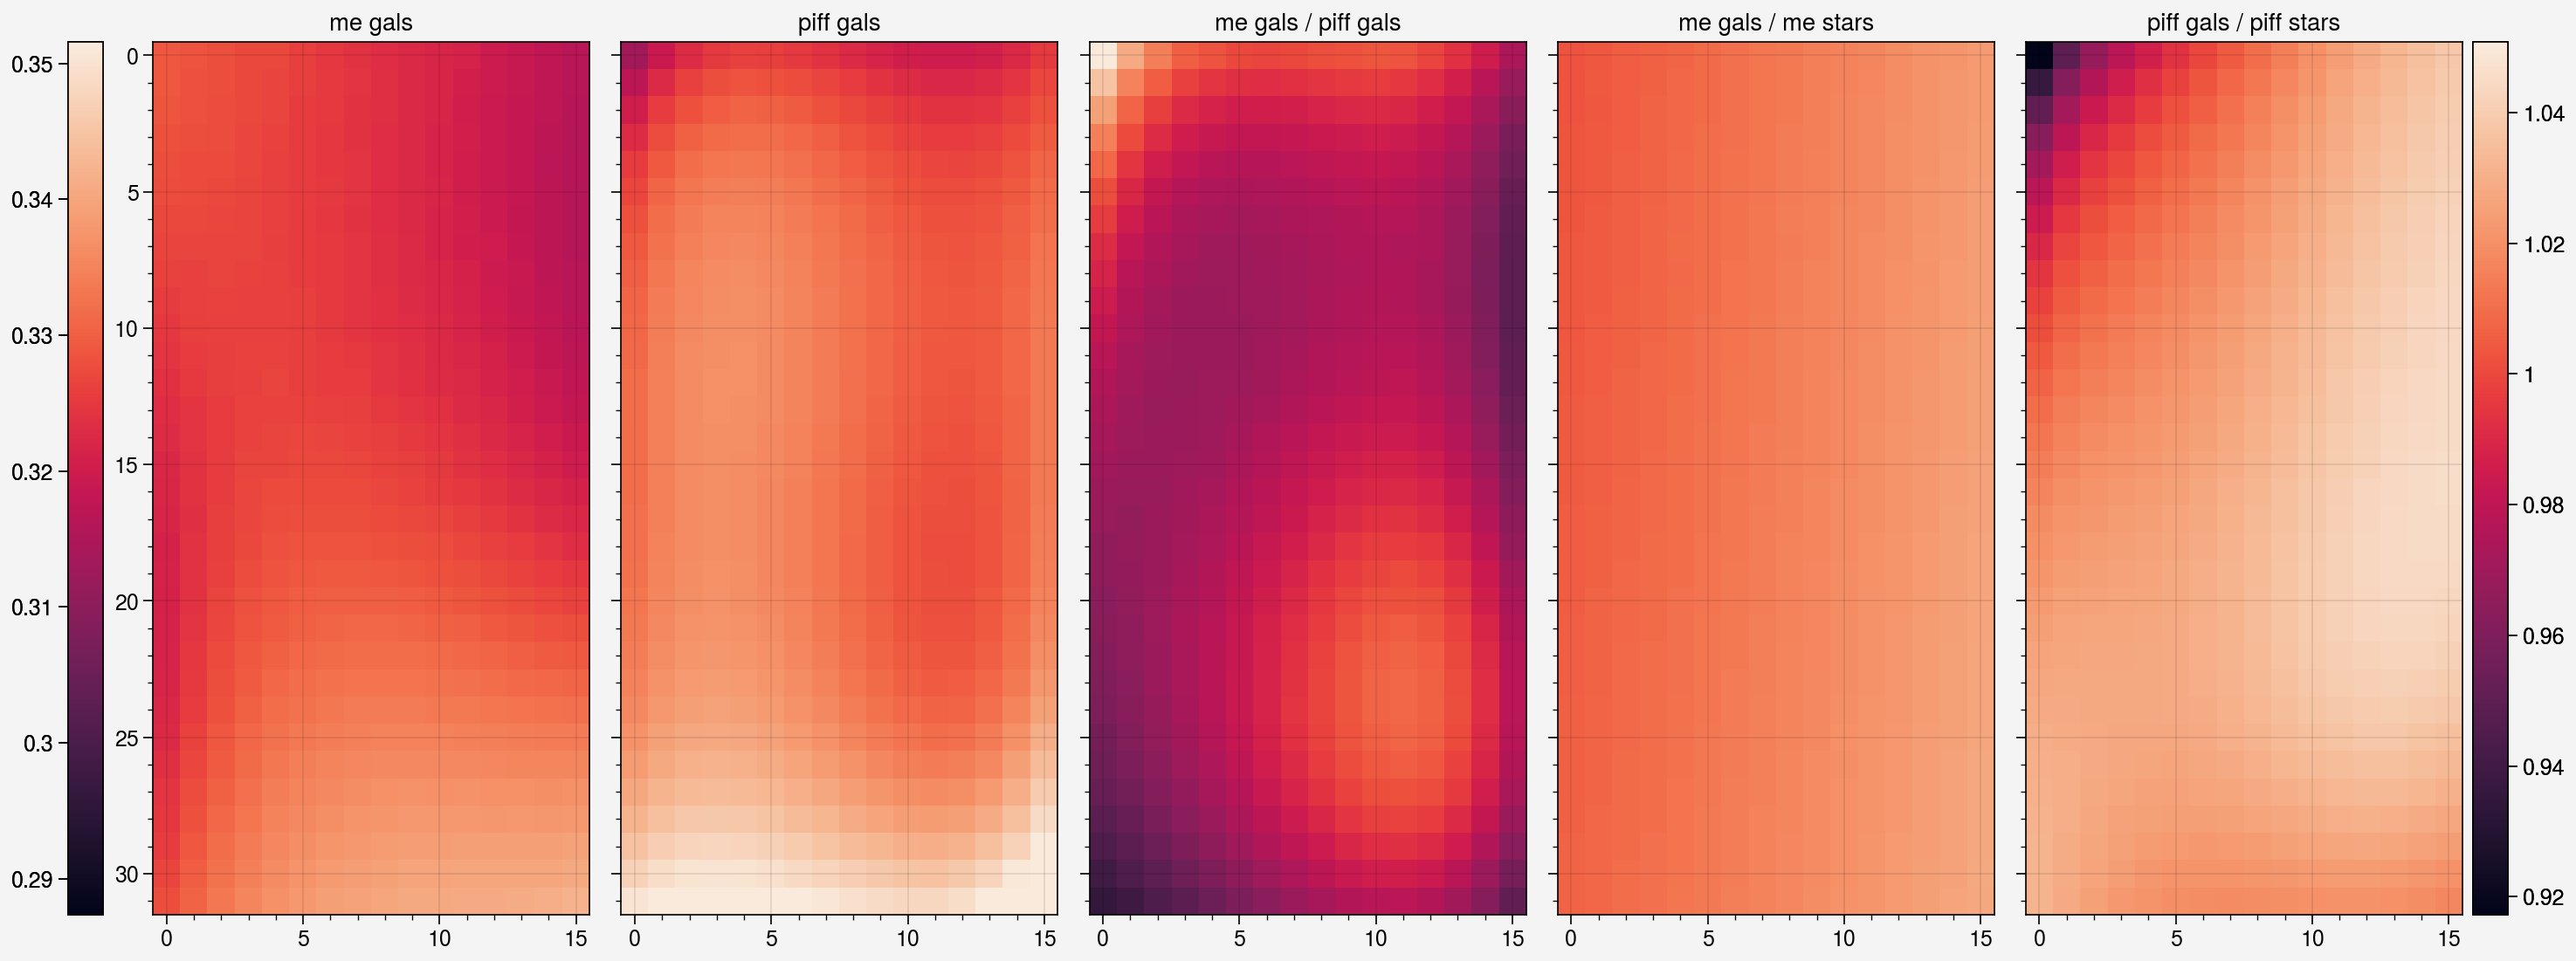

In [54]:
from des_y6utils.piff import measure_t_grid_for_piff_model

res_me = measure_t_grid_for_piff_model(mmod, {"GI_COLOR": 0.61})
res_piff = measure_t_grid_for_piff_model(piff_mod, {"GI_COLOR": 0.61})


res_me_s = measure_t_grid_for_piff_model(mmod, {"GI_COLOR": 1.61})
res_piff_s = measure_t_grid_for_piff_model(piff_mod, {"GI_COLOR": 1.61})

vmin = min(np.nanmin(res_me), np.nanmin(res_piff))
vmax = min(np.nanmax(res_me), np.nanmax(res_piff))

fig, axs = pplt.subplots(ncols=5)
h = axs[0].imshow(res_me_s, cmap="rocket", vmin=vmin, vmax=vmax)
axs[0].colorbar(h, loc='l')
axs[0].set_title("me gals")
axs[1].imshow(res_piff_s, cmap="rocket", vmin=vmin, vmax=vmax)
axs[1].set_title("piff gals")

vmin = np.nanmin([res_me_s/res_piff_s, res_me/res_me_s, res_piff/res_piff_s])
vmax = np.nanmax([res_me_s/res_piff_s, res_me/res_me_s, res_piff/res_piff_s])

axs[2].imshow(res_me_s/res_piff_s, cmap="rocket", vmin=vmin, vmax=vmax)
axs[2].set_title("me gals / piff gals")
axs[3].imshow(res_me/res_me_s, cmap="rocket", vmin=vmin, vmax=vmax)
axs[3].set_title("me gals / me stars")
h = axs[4].imshow(res_piff/res_piff_s, cmap="rocket", vmin=vmin, vmax=vmax)
axs[4].colorbar(h, loc="r")
axs[4].set_title("piff gals / piff stars")

In [55]:
print(np.nanmin(res_me/res_me_s), np.nanmax(res_me/res_me_s))
print(np.nanmin(res_me/res_piff_s), np.nanmax(res_me/res_piff_s))

1.0031051808264104 1.0278882270184413
0.9424605094802186 1.0540927335134953


In [ ]:
x = 1*128 + 64
y = 1*128 + 64 
GI_COLOR = 1.61

fig, axs = pplt.subplots()

_img = mmod.draw(
    x=x, 
    y=y, 
    GI_COLOR=GI_COLOR,
)

axs.imshow(_img.array)

dilation, g1, g2 = mmod.get_dilation_eta1eta2(
    x=x, 
    y=y, 
    GI_COLOR=GI_COLOR,
)

print("    color|dilation|g1|g2:", GI_COLOR, dilation, g1, g2)

In [ ]:
p = None # mmod.get_init_params()

for i in range(0, len(mmod.stars)):
    print("star:", i)

    _img = mmod.draw(
        x=mmod.stars[i].meta["x"], 
        y=mmod.stars[i].meta["y"], 
        GI_COLOR=mmod.stars[i].meta["col"],
        params=p,
    )

    piff_img = galsim.ImageD(
        mmod.fit_data["star_dim"], 
        mmod.fit_data["star_dim"], 
        wcs=mmod.stars[i].meta["local_wcs"],
    )
    dx = mmod.stars[i].meta["x"] - np.floor(mmod.stars[i].meta["x"] + 0.5) + (mmod.fit_data["star_dim"] -1)/2
    dy = mmod.stars[i].meta["y"] - np.floor(mmod.stars[i].meta["y"] + 0.5) + (mmod.fit_data["star_dim"] -1)/2
    piff_img = piff_mod.draw(
        x=mmod.stars[i].meta["x"]+1, 
        y=mmod.stars[i].meta["y"]+1, 
        GI_COLOR=mmod.stars[i].meta["col"], 
        chipnum=list(piff_mod.wcs.keys())[0],
        center=(dx+1, dy+1),
        image=piff_img,
    )
    print(
        "    sums piff|me|img:", 
        np.sum(piff_img.array), 
        np.sum(_img.array), 
        np.sum(mmod.stars[i].image)
    )
    fig, axs = pplt.subplots(nrows=1, ncols=4)

    swgt = np.sqrt(mmod.stars[i].weight)
    piff_img = piff_img.array
    h0 = axs[0].imshow((_img.array - piff_img) * swgt)
    axs[0].colorbar(h0, loc='l')

    vmin = np.nanmin([piff_img, _img.array, mmod.stars[i].image])
    vmax = np.nanmax([piff_img, _img.array, mmod.stars[i].image])

    axs[1].imshow(piff_img, vmin=vmin, vmax=vmax)
    axs[2].imshow(_img.array, vmin=vmin, vmax=vmax)
    axs[3].imshow(mmod.stars[i].image, vmin=vmin, vmax=vmax)

    dof = mmod.fit_data["star_dim"]**2
    print(
        "    piff chi2/dof:", 
        np.sum(((mmod.stars[i].image - piff_img) * np.sqrt(mmod.stars[i].weight))**2)/dof
    )
    print(
        "    me   chi2/dof:",
        np.sum(((mmod.stars[i].image - _img.array/np.sum(_img.array)) * np.sqrt(mmod.stars[i].weight))**2)/dof
    )

    dilation, g1, g2 = mmod.get_dilation_eta1eta2(
        x=mmod.stars[i].meta["x"], 
        y=mmod.stars[i].meta["y"], 
        GI_COLOR=mmod.stars[i].meta["col"],
        params=p,
    )


    print("    color|dilation|g1|g2:", mmod.stars[i].meta["col"], dilation, g1, g2)
    # break

In [ ]:
p = mmod.get_init_params()

In [ ]:
p[:17*17*4].reshape(17*17,4)[8*17+8, :]

In [ ]:
assert not np.array_equal(mmod.draw(x=10, y=100, GI_COLOR=0.61), mmod.draw(x=10, y=100, GI_COLOR=0.61))

In [ ]:
i = 24
_img = mmod.draw(x=mmod.stars[i].meta["x"], y=mmod.stars[i].meta["y"], GI_COLOR=mmod.stars[i].meta["col"])

piff_img = piff_mod.draw(
    x=mmod.stars[i].meta["x"], 
    y=mmod.stars[i].meta["y"], 
    GI_COLOR=mmod.stars[i].meta["col"], 
    chipnum=list(piff_mod.wcs.keys())[0],
)
print(np.sum(piff_img.array), np.sum(_img.array), np.sum(mmod.stars[i].image))
fig, axs = pplt.subplots(nrows=1, ncols=3)
xcen = piff_img.center.x - piff_img.bounds.xmin
ycen = piff_img.center.y - piff_img.bounds.ymin
axs[0].imshow(piff_img.array[ycen-8:ycen+8+1, xcen-8:xcen+8+1])
axs[1].imshow(_img.array)
axs[2].imshow(mmod.stars[i].image)

In [ ]:
%debug

In [ ]:
piff_mod.get_profile?

In [ ]:
thresh = 10
t_arr = measure_t_grid_for_piff_model(piff_mod, {"GI_COLOR": 0.61})
data = measure_star_t_for_piff_model(piff_mod, img, wgt, piff_prop="GI_COLOR")
ts_arr = map_star_t_to_grid(data)

res_g = make_good_regions_for_piff_model_gal_grid(piff_mod, piff_kwargs={"GI_COLOR": 0.61}, seed=11, verbose=False)
res_sg = make_good_regions_for_piff_model_star_and_gal_grid(
    piff_mod, img, wgt, piff_kwargs={"GI_COLOR": 0.61}, seed=11, verbose=False,
    flag_bad_thresh=thresh, any_bad_thresh=thresh,
)

In [ ]:
vmin = min(np.nanmin(ts_arr), np.nanmin(t_arr))
vmax = max(np.nanmax(ts_arr), np.nanmax(t_arr))

fig, axs = pplt.subplots(ncols=3, share=0)
h0 = axs[0].imshow(ts_arr, vmin=vmin, vmax=vmax, cmap="rocket")
axs[0].grid(False)
axs[0].set_title("stars on grid w/ 2d poly")
axs[0].colorbar(h0, loc='l')

axs[1].imshow(t_arr, vmin=vmin, vmax=vmax, cmap="rocket")
axs[1].grid(False)
axs[1].set_title("grid of shapes at gal color")

b = res_g["bbox"]
axs[1].plot([b["xmin"]/128, b["xmin"]/128], [b["ymin"]/128, b["ymax"]/128 - 1], color="red")
axs[1].plot([b["xmax"]/128 - 1, b["xmax"]/128 - 1], [b["ymin"]/128, b["ymax"]/128 - 1], color="red")
axs[1].plot([b["xmin"]/128, b["xmax"]/128 - 1], [b["ymin"]/128, b["ymin"]/128], color="red")
axs[1].plot([b["xmin"]/128, b["xmax"]/128 - 1], [b["ymax"]/128 - 1, b["ymax"]/128 - 1], color="red")

b = res_sg["bbox"]
axs[1].plot([b["xmin"]/128, b["xmin"]/128], [b["ymin"]/128, b["ymax"]/128 - 1], color="blue")
axs[1].plot([b["xmax"]/128 - 1, b["xmax"]/128 - 1], [b["ymin"]/128, b["ymax"]/128 - 1], color="blue")
axs[1].plot([b["xmin"]/128, b["xmax"]/128 - 1], [b["ymin"]/128, b["ymin"]/128], color="blue")
axs[1].plot([b["xmin"]/128, b["xmax"]/128 - 1], [b["ymax"]/128 - 1, b["ymax"]/128 - 1], color="blue")

harr = (t_arr-ts_arr).ravel()
std5 = nanmad(harr) * thresh
h = axs[2].hist(harr, bins=50)
axs[2].vlines([-std5, np.nanmedian(harr)+std5], 0, np.max(h[0]), color="k")
axs[2].set_xlabel("gal T - star T")
ax = axs[0]

In [ ]:
import ngmix

def get_star_stamp_pos(s, img, wgt):
    xint = int(np.floor(s.x - 1 + 0.5))
    yint = int(np.floor(s.y - 1 + 0.5))
    bbox = 17
    bbox_2 = (bbox - 1)//2
    
    return dict(
        img=img[yint-bbox_2: yint+bbox_2+1, xint-bbox_2: xint+bbox_2+1],
        wgt=wgt[yint-bbox_2: yint+bbox_2+1, xint-bbox_2: xint+bbox_2+1],
        xstart=xint-bbox_2, 
        ystart=yint-bbox_2,
        dim=bbox,
        x=s.x - 1,
        y=s.y - 1,
    )

def get_star_piff_obs(piff_mod, s, img, wgt):
    
    sres = get_star_stamp_pos(s, img, wgt)
    
    xv = sres["x"]+1
    yv = sres["y"]+1
    wcs = list(piff_mod.wcs.values())[0].local(
        image_pos=galsim.PositionD(x=xv, y=yv)
    ).jacobian()
    img = galsim.ImageD(sres["dim"], sres["dim"], wcs=wcs)
    cen = (
        sres["x"] - sres["xstart"] + 1,
        sres["y"] - sres["ystart"] + 1,
    )
    img = piff_mod.draw(
        x=xv, y=yv, chipnum=list(piff_mod.wcs.keys())[0],
        GI_COLOR=s.data.properties["GI_COLOR"],
        image=img, center=cen,
    )
    model_obs = ngmix.Observation(
        image=img.array,
        jacobian=ngmix.Jacobian(
            y=cen[1]-1,
            x=cen[0]-1,
            wcs=wcs,
        )
    )
    star_obs = ngmix.Observation(
        image=sres["img"],
        weight=sres["wgt"],
        jacobian=ngmix.Jacobian(
            y=cen[1]-1,
            x=cen[0]-1,
            wcs=wcs,
        )
    )
    return model_obs, star_obs, sres

In [ ]:

x = []
y = []
t = []

for s in piff_mod.stars:

    mobs, sobs, sres = get_star_piff_obs(piff_mod, s, img, wgt)
    
    res = ngmix.admom.AdmomFitter(
        rng=np.random.RandomState(seed=10)
    ).go(mobs, ngmix.moments.fwhm_to_T(1))
    t.append(res["T"])
    x.append(sres["x"])
    y.append(sres["y"])
    

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(np.array([x, y]).T, np.array(t))

In [ ]:
y, x = np.mgrid[0:4096:128, 0:2048:128] + 64
tg = polyreg.predict(np.array([x.ravel(), y.ravel()]).T)

In [ ]:
tg = tg.reshape(x.shape)

In [ ]:
fig, axs = pplt.subplots(ncols=2)
axs[0].imshow(tg)
axs[1].imshow(res["t_arr"])

In [ ]:
def _nanmad(x, axis=None):
    """
    median absolute deviation - scaled like a standard deviation

        mad = 1.4826*median(|x-median(x)|)

    Parameters
    ----------
    x: array-like
        array to take MAD of
    axis : {int, sequence of int, None}, optional
        `axis` keyword for

    Returns
    -------
    mad: float
        MAD of array x
    """
    return 1.4826*np.nanmedian(np.abs(x - np.nanmedian(x, axis=axis)), axis=axis)


In [ ]:
print(_nanmad(t), _nanmad(tg))

In [ ]:
from des_y6utils.piff import make_good_regions_for_piff_model

In [ ]:
res = make_good_regions_for_piff_model(piff_mod, piff_kwargs={"GI_COLOR": 0.61}, seed=10, verbose=False)

In [ ]:
res["t_std"]

In [ ]:
fig, axs = pplt.subplots()

axs.hist((res["t_arr"] - tg).ravel(), bins=50)

In [ ]:
np.std((res["t_arr"] - tg).ravel()) * 5

In [ ]:
np.max(np.abs(np.max(t) - np.median(t)))

In [ ]:
_nanmad(t)

In [ ]:
img = np.ones((17, 17))* 5
print(img.sum())
gs = galsim.InterpolatedImage(galsim.ImageD(img), scale=0.3, x_interpolant="lanczos3", normalization="flux")

print(gs.drawImage(nx=27, ny=27, scale=0.263, method="no_pixel").array.sum())

In [ ]:
a = jnp.array([10, 10])

In [ ]:
a.to_py()